<a href="https://colab.research.google.com/github/lompas10/ML_course_MIREA/blob/main/2/lab_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
# В этой лабораторной работе вам предстоит обучить модель логистической регрессии.
# Представьте, что вы сотрудник приемной комиссии и хотите оценить шансы студента на прохождение на бюджет.
# У вас есть исторические данные о сдачах студентами двух входных экзаменов по 100-балльной шкале.
# Кроме того, данные размечены. То есть студенты, прошедшие отбор помечены меткой 1, остальные 0.

# Ваша задача - заполнить код в функциях:
# logistic - вычисляет логистическую функцию от аргумента,
# compute_cost - вычисляет функцию стоимости,
# compute_cost_grad - вычисляет градиент функции стоимости.

# В данной задаче будет использоваться градиентный метод оптимизации, определенный в библиотеке scipy, так что
# не нужно реализовывать градиентный спуск.

# По ходу работы смотрите в консоль. Там будут выводиться результаты написанных вами функций и ожидаемые результаты.
# Так вы сможете проверить себя.

# Комментарии к графикам:
# Первый график - исходные данные
# Второй - исходные данные с результатом работы модели - границей решений.
# Черным цветом обозначено поле, попадание точки в которое означает ее
# принадлежность к 1 классу (студент проходит на бюджет), белым - принадлежность к 0 классу (не проходит на бюджет).

In [7]:
def logistic(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def compute_cost(X, y, theta):

    # Функция принимает матрицу данный X, вектор целевых переменных y и вектор параметров theta.
    # Должна возвратить число - результат вычисления функции стоимости в точке theta.

    m, n = X.shape
    return np.mean(-(y * np.log(logistic(X @ theta)) + (1 - y) * np.log(1 - logistic(X @ theta))))

In [9]:
def compute_cost_grad(X, y, theta):
    # Функция принимает матрицу данный X, вектор целевых переменных y и вектор параметров theta.
    # Должна возвратить вектор координат градиента функции стоимости в точке theta.
    # Вектор можно заполнять в виде списка python. При возврате он преобразуется в массив numpy.

    m, n = X.shape  # m - количество примеров в выборке, n - количество признаков у каждого примера
    grad = 1 / m * ((logistic(X @ theta) - y).T @ X)  # вектор градиента функции стоимости по theta, его нужно заполнить

    return np.array(grad)


In [10]:
def load_data(data_file_path):
    with open(data_file_path) as input_file:
        X = list()
        y = list()
        for line in input_file:
            *row, label = map(float, line.split(','))
            X.append([1] + row)
            y.append(label)
        return np.array(X, float), np.array(y, float)

In [11]:
X, y = load_data('lab2data1.txt')

In [12]:
print(f'logistic(0) = {logistic(np.array(0))} (должно быть 0.5)\n'
      f'logistic(-10) = {logistic(np.array(-10))} (должно быть ~0)\n'
      f'logistic(10) = {logistic(np.array(10))} (должно быть ~1)')

logistic(0) = 0.5 (должно быть 0.5)
logistic(-10) = 4.5397868702434395e-05 (должно быть ~0)
logistic(10) = 0.9999546021312976 (должно быть ~1)


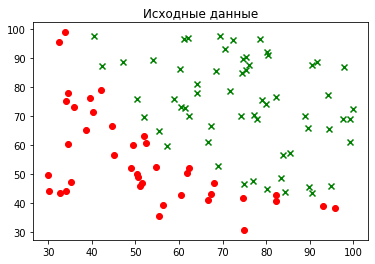

In [13]:
plt.title('Исходные данные')
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], c='r', marker='o')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], c='g', marker='x')
plt.show()

In [14]:
init_theta = np.zeros((X.shape[1], 1))
cost0 = compute_cost(X, y, init_theta)
print(f'Функция стоимости при начальном theta = {cost0} (должно быть ~0.693)')

Функция стоимости при начальном theta = 0.6931471805599453 (должно быть ~0.693)


In [15]:
opt_theta_obj = minimize(lambda th: compute_cost(X, y, th), init_theta,
                         method='CG',
                         jac=lambda th: compute_cost_grad(X, y, th),
                         options={'gtol': 1e-5, 'maxiter': 200, 'disp': False})

print('Минимизация функции стоимости ' + ('прошла успешно.' if opt_theta_obj.success else 'не удалась.'))

Минимизация функции стоимости прошла успешно.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


In [16]:
opt_theta = opt_theta_obj.x

opt_cost = compute_cost(X, y, opt_theta)
print(f'Функция стоимости при оптимальном theta = {opt_cost} (должно быть ~0.203)')

Функция стоимости при оптимальном theta = 0.20349770160313937 (должно быть ~0.203)


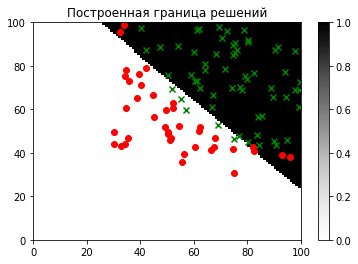

In [17]:
hm = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        hm[i, j] = round(logistic(opt_theta @ np.array([1, j, i])))
c = plt.pcolor(range(101), range(101), hm, cmap='Greys')
plt.colorbar(c)

plt.title('Построенная граница решений')
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], c='r', marker='o')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], c='g', marker='x')
plt.show()
